# Task - 3



## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# # Import all the required Libraries

# import pandas as pd
# import numpy as np

# import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

# ______________________________
# ______________________________


In [3]:
# Check the shape of the dataframe

# ______________________________
# ______________________________


In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________


## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# ____________________________

# ____________________________

In [6]:
# Check again Holding_Policy_Duration is in object column convert that into int

# ____________________________

In [7]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


# ____________________________
# ____________________________

In [8]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
    


In [9]:
# Now again having a look at all those columns to see if everything went well

# _________________________________

In [10]:
# Observe that all those columns are now converted from Object to Int64

# ________________________________

In [11]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

# ______________________________
# ______________________________

In [12]:
# You can also do this to separate Object columns

# ____________________________

In [13]:
# Lets just try to see what is happening Response. Check the output.



In [14]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
# ______________________________
# ______________________________




In [15]:
# Getting all the Object Dtypes



In [16]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________




In [17]:
# Concatinating the original data frame and onehot encoded dataframe



In [18]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe



## Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

In [19]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('train_cleaned_2.csv')
data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,Response,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,C3,64,1,1,36,36,0,15,2.0,16,...,0,1,0,0,0,0,0,0,0,0
1,C3,2955,1,1,66,66,0,10,1.0,19,...,0,0,0,0,0,0,1,0,0,0
2,C1,1542,0,1,24,24,0,3,1.0,16,...,0,1,0,0,0,0,0,0,0,0
3,C26,772,0,1,75,75,0,1,3.0,16,...,0,1,0,0,0,0,0,0,0,0
4,C2,1510,1,0,59,58,1,15,4.0,17,...,0,1,0,0,0,0,0,0,0,0


In [21]:
data.shape

(9849, 21)

In [22]:
data['Response'].value_counts()/9993 *100  # in percentages

0    74.281997
1    24.276994
Name: Response, dtype: float64

### `Sampling ( UnderSampling ) ---------------------------`

In [23]:
X = data.drop(['Response'],axis=1)
y = data['Response']

In [24]:
# ! pip install imblearn
from collections import Counter

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus,y_rus = rus.fit_resample(X,y)

In [26]:
print(Counter(y_rus))

Counter({0: 2426, 1: 2426})


In [27]:
y_rus.value_counts()

0    2426
1    2426
Name: Response, dtype: int64

### `Standardise --------------------------------------------------`

In [28]:
pd.set_option("display.max_rows", None, "display.max_columns", None)   # display entire dataframe
X_rus.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,C24,2347,1,1,51,51,0,15,3.0,2,15904.0,0,0,1,0,0,0,0,0,0
1,C2,925,0,1,23,23,0,15,3.0,22,3618.0,0,0,0,0,0,1,0,0,0
2,C2,2290,1,0,51,49,1,8,3.0,12,22915.2,0,1,0,0,0,0,0,0,0
3,C4,179,0,1,26,26,0,15,3.0,1,10026.0,1,0,0,0,0,0,0,0,0
4,C19,1806,1,0,29,28,1,4,2.0,1,17280.0,1,0,0,0,0,0,0,0,0


In [29]:
X_rus.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
      dtype='object')

In [30]:
data.sample(10)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,X1,X2,X3,X4,X5,X6,X7,X8,X9
8642,C2,577,0,1,27,27,0,2,1.0,21,13068.0,0,0,0,0,0,0,0,1,0,0
4069,C1,785,1,0,65,62,1,8,3.0,22,23251.2,0,0,1,0,0,0,0,0,0,0
5020,C15,1831,1,1,37,37,0,5,2.0,18,9450.0,0,0,1,0,0,0,0,0,0,0
7224,C26,452,0,0,70,65,1,15,3.0,10,25074.0,1,0,1,0,0,0,0,0,0,0
2537,C6,1305,0,1,27,27,0,15,3.0,22,5416.0,0,0,1,0,0,0,0,0,0,0
6330,C1,1855,1,1,67,67,0,15,3.0,22,13992.0,0,1,0,0,0,0,0,0,0,0
9612,C1,99,1,1,59,59,0,9,1.0,5,17724.0,0,1,0,0,0,0,0,0,0,0
6810,C3,2084,1,0,42,18,0,5,2.0,15,20731.2,1,0,0,1,0,0,0,0,0,0
9727,C13,687,0,0,38,33,1,8,3.0,18,13910.4,1,0,0,1,0,0,0,0,0,0
8349,C2,5537,0,0,52,50,1,15,1.0,18,16905.6,1,1,0,0,0,0,0,0,0,0


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_rus[['Region_Code',
       'Upper_Age', 'Lower_Age','Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']] = sc.fit_transform(X_rus[['Region_Code',
       'Upper_Age', 'Lower_Age','Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']])

In [32]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_rus[['Region_Code','Upper_Age', 'Lower_Age','Holding_Policy_Type','Holding_Policy_Duration', 'Reco_Policy_Cat','Reco_Policy_Premium']] = sc.fit_transform(X_rus[['Region_Code','Upper_Age', 'Lower_Age','Holding_Policy_Type', 'Holding_Policy_Duration','Reco_Policy_Cat','Reco_Policy_Premium']])

In [33]:
X_rus.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,C24,0.453041,1,1,0.388109,0.500390,0,0.915891,0.402364,-2.260962,0.338243,0,0,1,0,0,0,0,0,0
1,C2,-0.546579,0,1,-1.258835,-1.130593,0,0.915891,0.402364,1.071720,-1.709007,0,0,0,0,0,1,0,0,0
2,C2,0.412972,1,0,0.388109,0.383891,1,-0.319605,0.402364,-0.594621,1.506538,0,1,0,0,0,0,0,0,0
3,C4,-1.070993,0,1,-1.082377,-0.955844,0,0.915891,0.402364,-2.427596,-0.641224,1,0,0,0,0,0,0,0,0
4,C19,0.072735,1,0,-0.905918,-0.839346,1,-1.025602,-0.774411,-2.427596,0.567530,1,0,0,0,0,0,0,0,0


In [34]:
X_rus.drop('City_Code',axis=1,inplace=True)  # drop City_Code

In [35]:
X_rus.to_csv('X_final.csv',index=False)
y_rus.to_csv('y_final.csv',index=False)

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

### Modelling
 Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

## `Logistic Regression -------------------------------------------`

#### `train`

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.5508889461479001
Precision => 0.5466048080978491
F-1 score => 0.5979238754325259
Confusion matrix =>
 [[ 842 1075]
 [ 668 1296]]
Recall score 0.659877800407332


#### `test`

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.4963954685890834
Precision => 0.47768595041322315
F-1 score => 0.541705716963449
Confusion matrix =>
 [[193 316]
 [173 289]]
Recall score 0.6255411255411255


### `AUC ROC ------------------------------------`

In [41]:
y_pred_proba_logistic = lr.predict_proba(X_test)
y_pred_proba_logistic

array([[0.45583486, 0.54416514],
       [0.69630627, 0.30369373],
       [0.4011112 , 0.5988888 ],
       ...,
       [0.64335534, 0.35664466],
       [0.44339997, 0.55660003],
       [0.40554647, 0.59445353]])

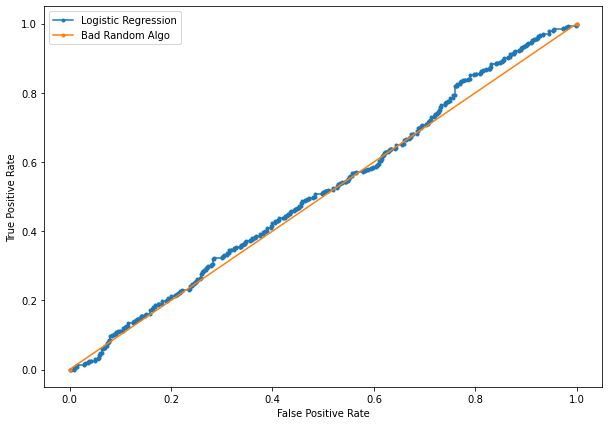

Logistic Regression AUC is => 0.5157808792386396


In [42]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

lr_prob = y_pred_proba_logistic[:,1]
lr_auc = roc_auc_score(y_test,lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds = roc_curve(y_test,lr_prob)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Logistic Regression AUC is => {lr_auc}')

## `SVC -------------------------------------------`

#### `train`

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6240659623808297
Precision => 0.6012024048096193
F-1 score => 0.6727965911639382
Confusion matrix =>
 [[ 922  995]
 [ 464 1500]]
Recall score 0.7637474541751528


#### `test`

In [45]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [46]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5314109165808445
Precision => 0.5056726094003241
F-1 score => 0.5783132530120482
Confusion matrix =>
 [[204 305]
 [150 312]]
Recall score 0.6753246753246753


### `AUC ROC ------------------------------------`

In [47]:
y_pred_proba_svc = svc.predict_proba(X_test)
y_pred_proba_svc

array([[0.47870652, 0.52129348],
       [0.63730861, 0.36269139],
       [0.43635476, 0.56364524],
       ...,
       [0.58703562, 0.41296438],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ]])

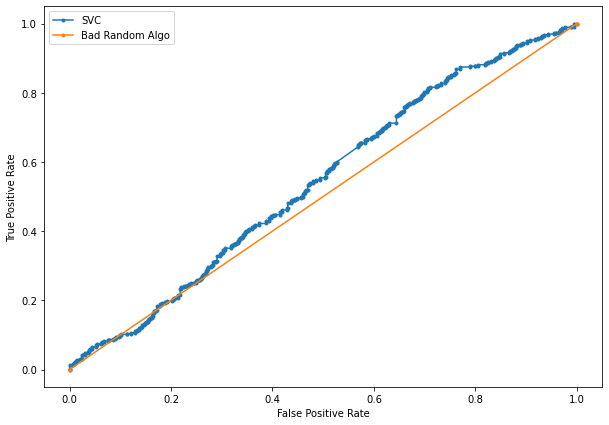

SVC AUC is => 0.5438428630963013


In [48]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

svc_prob = y_pred_proba_svc[:,1]
svc_auc = roc_auc_score(y_test,svc_prob)   # logistic regression
svc_fpr,svc_tpr,thesholds = roc_curve(y_test,svc_prob)
plt.plot(svc_fpr,svc_tpr,marker='.',label='SVC')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'SVC AUC is => {svc_auc}')

## `KNN -------------------------------------------`

#### train

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)

In [50]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.7044576140170059
Precision => 0.7019278299555116
F-1 score => 0.7123150238274392
Confusion matrix =>
 [[1314  603]
 [ 544 1420]]
Recall score 0.7230142566191446


#### test

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [52]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.49536560247167866
Precision => 0.4723320158102767
F-1 score => 0.49380165289256195
Confusion matrix =>
 [[242 267]
 [223 239]]
Recall score 0.5173160173160173


### `AUC ROC ------------------------------------------`

In [53]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       ...,
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4]])

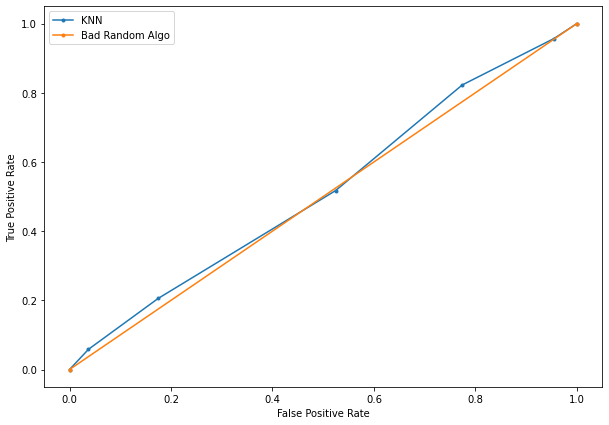

KNN AUC is => 0.5178093026816013


In [54]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

knn_prob = y_pred_proba_knn[:,1]
knn_auc = roc_auc_score(y_test,knn_prob)   # logistic regression
knn_fpr,knn_tpr,thesholds = roc_curve(y_test,knn_prob)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'KNN AUC is => {knn_auc}')

## `Decision Tree -------------------------------------------`

#### train

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
dtrc.fit(X_train,y_train)
y_pred = dtrc.predict(X_train)

In [56]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 1.0
Precision => 1.0
F-1 score => 1.0
Confusion matrix =>
 [[1917    0]
 [   0 1964]]
Recall score 1.0


#### test

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
dtrc.fit(X_train,y_train)
y_pred = dtrc.predict(X_test)

In [58]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5478887744593203
Precision => 0.5248380129589633
F-1 score => 0.5254054054054054
Confusion matrix =>
 [[289 220]
 [219 243]]
Recall score 0.525974025974026


### `AUC ROC -------------------------------------`

In [59]:
y_pred_proba_dtree = dtrc.predict_proba(X_test)
y_pred_proba_dtree

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

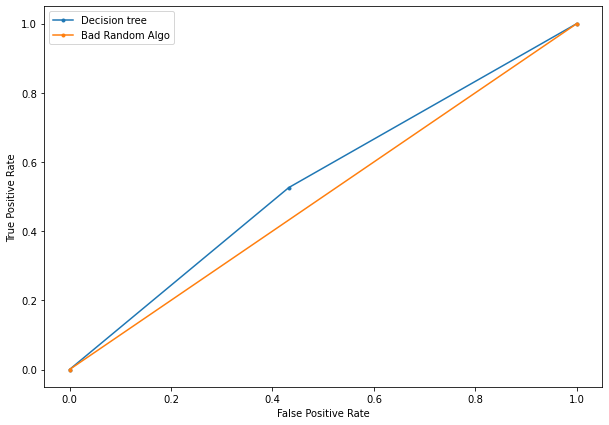

Decision Tree AUC is => 0.5468769933406475


In [60]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

dtree_prob = y_pred_proba_dtree[:,1]
dtree_auc = roc_auc_score(y_test,dtree_prob)   # logistic regression
dtree_fpr,dtree_tpr,thesholds = roc_curve(y_test,dtree_prob)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {dtree_auc}')

## `Random Forest -------------------------------------------`

#### train

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_train)

In [62]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 1.0
Precision => 1.0
F-1 score => 1.0
Confusion matrix =>
 [[1917    0]
 [   0 1964]]
Recall score 1.0


#### test

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [64]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5118434603501545
Precision => 0.48785425101214575
F-1 score => 0.5041841004184101
Confusion matrix =>
 [[256 253]
 [221 241]]
Recall score 0.5216450216450217


### `AUC ROC --------------------------------`

In [65]:
y_pred_proba_rfc = rfc.predict_proba(X_test)
y_pred_proba_rfc

array([[0.39, 0.61],
       [0.94, 0.06],
       [0.54, 0.46],
       ...,
       [0.55, 0.45],
       [0.33, 0.67],
       [0.51, 0.49]])

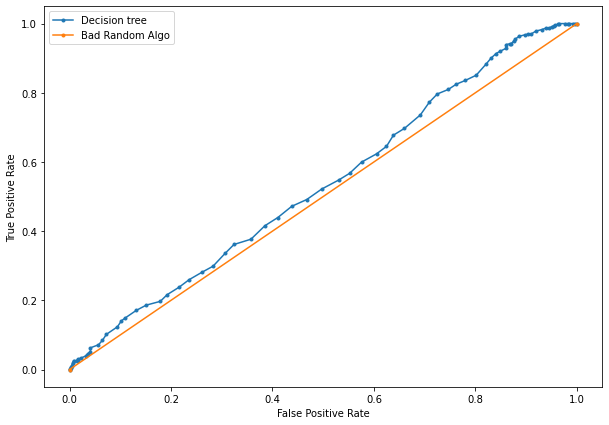

Decision Tree AUC is => 0.5349913675061023


In [66]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

rfc_prob = y_pred_proba_rfc[:,1]
rfc_auc = roc_auc_score(y_test,rfc_prob)   # logistic regression
rfc_fpr,rfc_tpr,thesholds = roc_curve(y_test,rfc_prob)
plt.plot(rfc_fpr,rfc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {rfc_auc}')

## `Gradient Boosting --------------------------------------`
[GBT](https://www.analyticsvidhya.com/blog/2021/03/gradient-boosting-machine-for-data-scientists/)

#### train

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_train)

In [68]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6745684102035557
Precision => 0.6494669509594883
F-1 score => 0.7068925504757484
Confusion matrix =>
 [[1095  822]
 [ 441 1523]]
Recall score 0.7754582484725051


#### test

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [71]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5417095777548918
Precision => 0.5151515151515151
F-1 score => 0.5650048875855327
Confusion matrix =>
 [[237 272]
 [173 289]]
Recall score 0.6255411255411255


### `AUC ROC --------------------------`

In [72]:
y_pred_proba_gbc = gbc.predict_proba(X_test)
y_pred_proba_gbc

array([[0.50522893, 0.49477107],
       [0.97619086, 0.02380914],
       [0.38421491, 0.61578509],
       ...,
       [0.28733054, 0.71266946],
       [0.37573582, 0.62426418],
       [0.40044536, 0.59955464]])

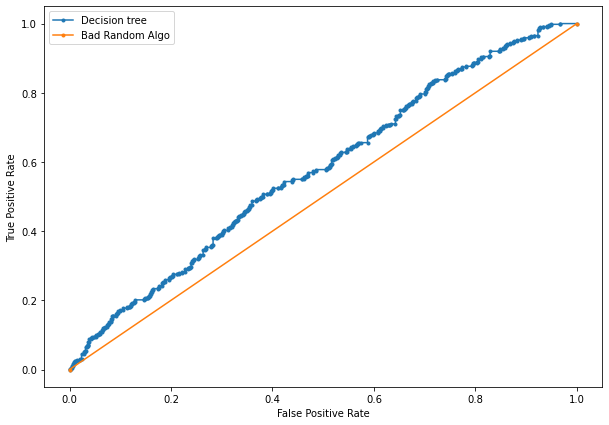

Decision Tree AUC is => 0.5773756368058922


In [73]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

gbc_prob = y_pred_proba_gbc[:,1]
gbc_auc = roc_auc_score(y_test,gbc_prob)   # logistic regression
gbc_fpr,gbc_tpr,thesholds = roc_curve(y_test,gbc_prob)
plt.plot(gbc_fpr,gbc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {gbc_auc}')

## `Ada Boost ---------------------------------------------------`

#### train

In [74]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_train)

In [75]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6150476681267715
Precision => 0.6005132591958939
F-1 score => 0.6527196652719666
Confusion matrix =>
 [[ 983  934]
 [ 560 1404]]
Recall score 0.714867617107943


#### test

In [76]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [77]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5427394438722966
Precision => 0.5161290322580645
F-1 score => 0.5647058823529412
Confusion matrix =>
 [[239 270]
 [174 288]]
Recall score 0.6233766233766234


### `AUC ROC ----------------------------`

In [78]:
y_pred_proba_abc = abc.predict_proba(X_test)
y_pred_proba_abc

array([[0.49993234, 0.50006766],
       [0.52165211, 0.47834789],
       [0.49803752, 0.50196248],
       ...,
       [0.51489389, 0.48510611],
       [0.49797061, 0.50202939],
       [0.49796841, 0.50203159]])

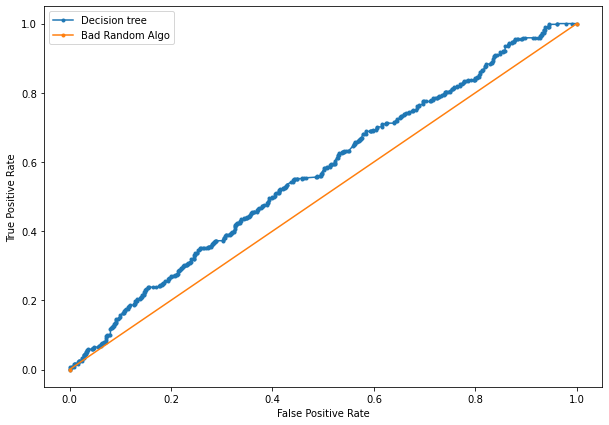

Decision Tree AUC is => 0.5662363177097951


In [79]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

abc_prob = y_pred_proba_abc[:,1]
abc_auc = roc_auc_score(y_test,abc_prob)   # logistic regression
abc_fpr,abc_tpr,thesholds = roc_curve(y_test,abc_prob)
plt.plot(abc_fpr,abc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {abc_auc}')

### `Till now Random Forest has highest performance, as it has 54% of accuracy`
### `Till now Random Forest has highest performance, as it has AUC of 56%`

## `END of Task3 ------------------------------------------------`